# HW 1 for MLF
**Name: 邢芳榕**

**Student ID：2201212427**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [3]:
df = pd.read_csv(".\GiveMeSomeCredit\cs-training.csv")
df.shape

(150000, 12)

In [4]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
df.mean()

Unnamed: 0                              75000.500000
SeriousDlqin2yrs                            0.066840
RevolvingUtilizationOfUnsecuredLines        6.048438
age                                        52.295207
NumberOfTime30-59DaysPastDueNotWorse        0.421033
DebtRatio                                 353.005076
MonthlyIncome                            6670.221237
NumberOfOpenCreditLinesAndLoans             8.452760
NumberOfTimes90DaysLate                     0.265973
NumberRealEstateLoansOrLines                1.018240
NumberOfTime60-89DaysPastDueNotWorse        0.240387
NumberOfDependents                          0.757222
dtype: float64

In [7]:
df.fillna(df.mean(), inplace=True)

In [8]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [9]:
from collections import Counter
Counter(df.iloc[:,1])

Counter({1: 10026, 0: 139974})

In [10]:
X_train, y_train = df.iloc[:,2:].values, df.iloc[:,1].values
print(X_train.shape, y_train.shape)

(150000, 10) (150000,)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)

In [12]:
X_train_std

array([[-0.02115001, -0.49385982,  0.37659296, ...,  4.40954554,
        -0.05785249,  1.12938692],
       [-0.02038516, -0.83234222, -0.10041896, ..., -0.90128301,
        -0.05785249,  0.22062674],
       [-0.02158222, -0.96773518,  0.138087  , ..., -0.90128301,
        -0.05785249, -0.68813345],
       ...,
       [-0.02323239,  0.38619443, -0.10041896, ..., -0.01614492,
        -0.05785249, -0.68813345],
       [-0.02421753, -1.50930703, -0.10041896, ..., -0.90128301,
        -0.05785249, -0.68813345],
       [-0.02081306,  0.79237332, -0.10041896, ...,  0.86899317,
        -0.05785249, -0.68813345]])

In [13]:
lr = LogisticRegression(penalty='l1', C=0.001, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.9333066666666666


In [14]:
lr.coef_

array([[ 0.        , -0.31862039,  0.1224065 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.01881742]])

In [15]:
lr2 = LogisticRegression(penalty='l1', C=0.0005, solver='liblinear')
lr2.fit(X_train_std, y_train)
print('Training accuracy:', lr2.score(X_train_std, y_train))
lr2.coef_

Training accuracy: 0.9330933333333333


array([[ 0.        , -0.20223063,  0.09574213,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [16]:
# character 2 and 3 are selected
X_train_selected = X_train_std[:,1:3]

In [17]:
X_train_selected

array([[-0.49385982,  0.37659296],
       [-0.83234222, -0.10041896],
       [-0.96773518,  0.138087  ],
       ...,
       [ 0.38619443, -0.10041896],
       [-1.50930703, -0.10041896],
       [ 0.79237332, -0.10041896]])

C:\Users\35542\AppData\Local\Temp/ipykernel_9940/2477770917.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_train_selected[y_train == 1, 0],


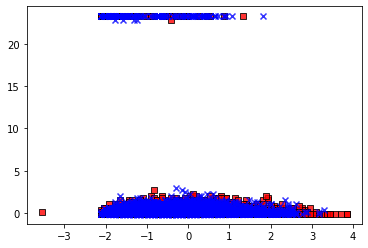

In [18]:
plt.scatter(x=X_train_selected[y_train == 0, 0], 
            y=X_train_selected[y_train == 0, 1],
            alpha=0.8, 
            color='red',
            marker='s', 
            label=0, 
            edgecolor='black')
plt.scatter(x=X_train_selected[y_train == 1, 0], 
            y=X_train_selected[y_train == 1, 1],
            alpha=0.8, 
            color='blue',
            marker='x', 
            label=1, 
            edgecolor='black')

C:\Users\35542\AppData\Local\Temp/ipykernel_9940/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


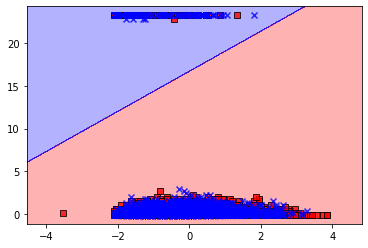

In [19]:
lr3 = LogisticRegression(penalty='l2', C=0.001, solver='liblinear')
lr3.fit(X_train_selected, y_train)
plot_decision_regions(X_train_selected, y_train, classifier=lr3)

C:\Users\35542\AppData\Local\Temp/ipykernel_9940/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


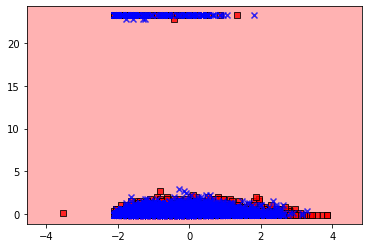

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train_selected, y_train)
plot_decision_regions(X_train_selected, y_train, classifier=tree_model)

D:\py\anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\35542\AppData\Local\Temp/ipykernel_9940/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


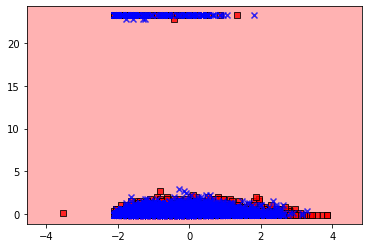

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1, max_iter=1000)
svm.fit(X_train_selected, y_train)
plot_decision_regions(X_train_selected, y_train, classifier=svm)

D:\py\anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\35542\AppData\Local\Temp/ipykernel_9940/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


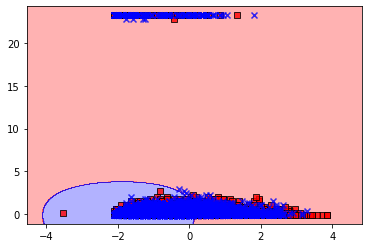

In [22]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0, max_iter=1000)
svm.fit(X_train_selected, y_train)
plot_decision_regions(X_train_selected, y_train, classifier=svm)

The problem here is mainly caused by the unbalanced labels. As shown previously, the ratio of class 0 and class 1 is 139974:10026, which means if we simply predict all data as class 0, we can get an accuracy of 93.316%, while at the same time the accuracy of the L1 LogisticRegression model we use to choose features is only 93.309%, which is even smaller than the trivial predict. Thus from this point of view, this way of feature selection has no reference value.